In [36]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,roc_auc_score



### LOADING AND ANALYSING DATA


In [3]:
#Load the data
df=pd.read_csv("./heart-disease.csv")
x=df.drop(columns=["target"])
y=df["target"]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

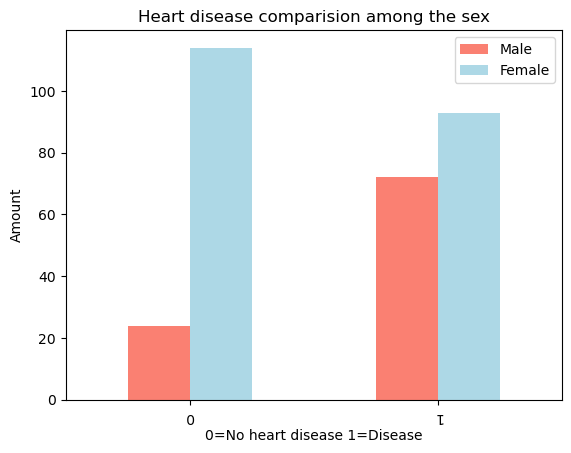

In [3]:
#Checking how target is changing with Sex
pd.crosstab(df.target,df.sex).plot(kind='bar',color=['salmon','lightblue'])
plt.title("Heart disease comparision among the sex")
plt.xlabel("0=No heart disease 1=Disease")
plt.ylabel("Amount")
plt.legend(['Male','Female'])
plt.xticks(rotation=180)

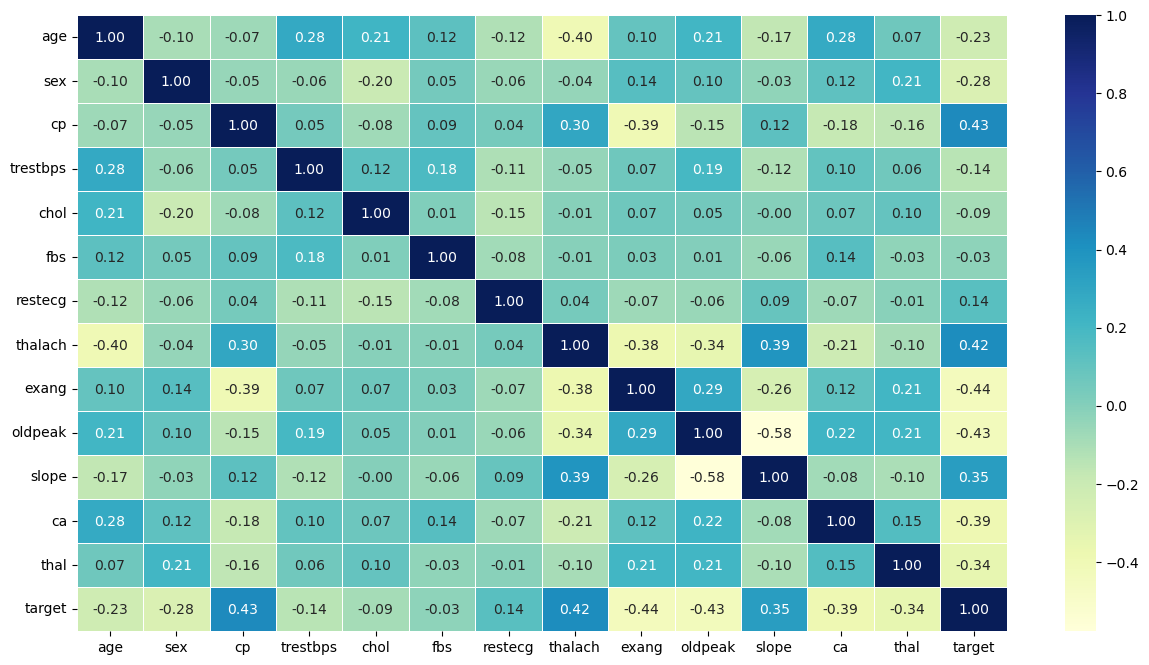

In [15]:
#Correlation Matrix of the data
corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.heatmap(corr_mat,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')  

In [10]:
X=df.drop(columns=["target"],axis=1)
y=df["target"]  

#Split the data into train and test
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


Trying three Different Models<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.KNearestClassifier<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.Logistic Regression<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.Random Forest Classifier

In [11]:
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates the different Machine Learning Models
    models-dictionary of different models
    X_train-Training data(no labels)
    X_test-Testing data(no labels)
    y_train-Training labels
    y_test-Testing labels
    """

    np.random.seed(42)
    model_scores={
        "Accuracy":{},
        "Precision":{},
        "Recall":{},
        "F1":{}
    }
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores["Accuracy"][name]=model.score(X_test,y_test)
        model_scores["Precision"][name]=precision_score(y_test,model.predict(X_test))
        model_scores["Recall"][name]=recall_score(y_test,model.predict(X_test))
        model_scores["F1"][name]=f1_score(y_test,model.predict(X_test))
    return model_scores



In [12]:
model_scores=fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

c:\Users\siva1\UDEMY_PROJECTS\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Accuracy': {'Logistic Regression': 0.8852459016393442,
  'KNN': 0.6885245901639344,
  'Random Forest': 0.8360655737704918},
 'Precision': {'Logistic Regression': 0.8787878787878788,
  'KNN': 0.6857142857142857,
  'Random Forest': 0.84375},
 'Recall': {'Logistic Regression': 0.90625,
  'KNN': 0.75,
  'Random Forest': 0.84375},
 'F1': {'Logistic Regression': 0.8923076923076924,
  'KNN': 0.7164179104477612,
  'Random Forest': 0.84375}}

<Axes: >

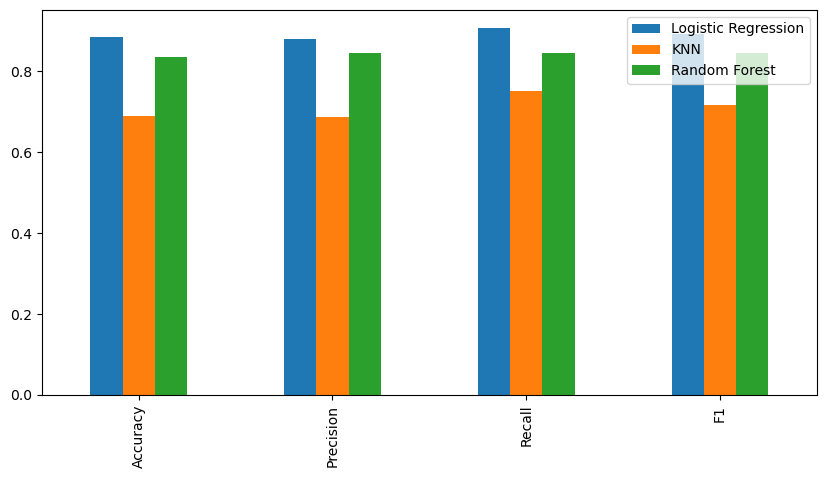

In [16]:
model_comparision=pd.DataFrame(model_scores)
model_comparision.T.plot(kind='bar',figsize=(10,5))

### Hyperparameter Tuning


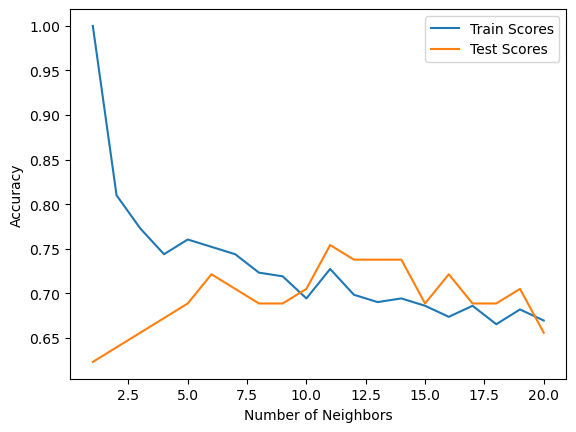

Maximum test accuracy is 75.41% for the model with no.of neighbors 11


In [21]:
#KNN (Hyperparameter tuning by hand)
train_scores=[]
test_scores=[]
K=range(1,21)
for i in K:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

plt.plot(K,train_scores,label="Train Scores")
plt.plot(K,test_scores,label="Test Scores")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(f"Maximum test accuracy is {max(test_scores)*100:.2f}% for the model with no.of neighbors {test_scores.index(max(test_scores))+1}")

In [29]:
#Hyperparameter tuning with RandomizedSearchCV


#Hyperparameter grid for Logistic Regression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":['liblinear']}

#Hyperparameter grid for Random Forest Classifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,7,10],
         "min_samples_split":np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2)}


In [30]:
np.random.seed(42)

#RandomizedSearchCV for Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),log_reg_grid,n_iter=20,cv=5,verbose=True)

#Fitting the model
rs_log_reg.fit(X_train,y_train)

#Getting the best Params
print(rs_log_reg.best_params_)

#Getting the best score
print(rs_log_reg.score(X_test,y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'solver': 'liblinear', 'C': 0.23357214690901212}
0.8852459016393442


In [31]:
np.random.seed(42)

#RandomizedSearchCV for Random Forest
rs_rf=RandomizedSearchCV(RandomForestClassifier(),rf_grid,n_iter=20,cv=5,verbose=True)

#Fitting the Model
rs_rf.fit(X_train,y_train)

#Getting the best Params
print(rs_rf.best_params_)

#Getting the best score
print(rs_rf.score(X_test,y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 260, 'min_samples_split': 16, 'min_samples_leaf': 17, 'max_depth': 3}
0.8852459016393442


In [ ]:
#Hyperparameter tuning with GridSearchCV for Logistic Regression

log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":['liblinear']}

gs_log_reg=GridSearchCV(LogisticRegression(),log_reg_grid,cv=5,verbose=True)

#Fitting the model
gs_log_reg.fit(X_train,y_train) 

#Getting the best Params
print(gs_log_reg.best_params_)

#Getting the best score
print(gs_log_reg.score(X_test,y_test))





Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'C': 0.20433597178569418, 'solver': 'liblinear'}
0.8852459016393442


In [34]:
#Predictions using the Model Linear Regression
y_pred=gs_log_reg.predict(X_test)


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

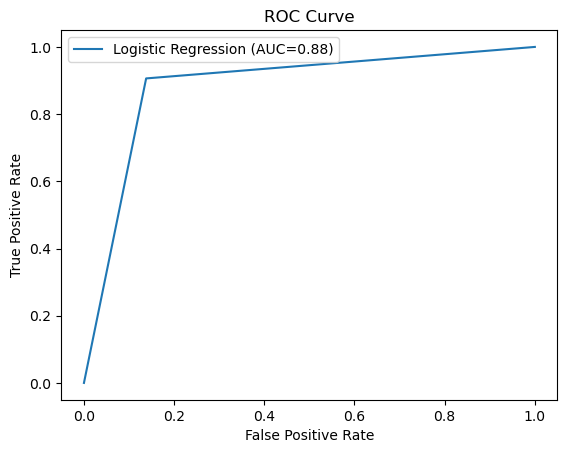

AUC is 0.8841594827586207


In [40]:
#Plotting ROC Curve and calculating AUC
auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label=f"Logistic Regression (AUC={auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


print(f"AUC is {auc}")

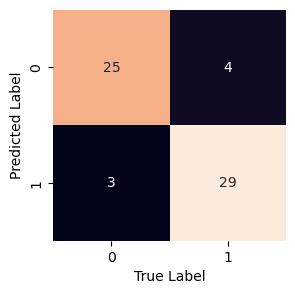

In [42]:
#Confusion Matrix
#print(confusion_matrix(y_test,y_pred))

def plot_confusion_matrix(y_test,y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_confusion_matrix(y_test,y_pred)

In [43]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [44]:
#Calculating Evaluating Metrics(Accuracy,Precison, Recall, F1) using Cross Validation

#Best Parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')    

#Cross Validated Accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring='accuracy')

print(f"Cross Validated Accuracy is {np.mean(cv_acc)*100:.2f}%")

Cross Validated Accuracy is 84.80%


In [47]:
#Cross Validated Precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring='precision')
print(f"Cross Validated Precision is {np.mean(cv_precision):.2f}")

#Cross Validated Recall
cv_recall=cross_val_score(clf,X,y,cv=5,scoring='recall')
print(f"Cross Validated Recall is {np.mean(cv_recall):.2f}")

#Cross Validated F1
cv_f1=cross_val_score(clf,X,y,cv=5,scoring='f1')
print(f"Cross Validated F1 is {np.mean(cv_f1):.2f}")

Cross Validated Precision is 0.82
Cross Validated Recall is 0.93
Cross Validated F1 is 0.87


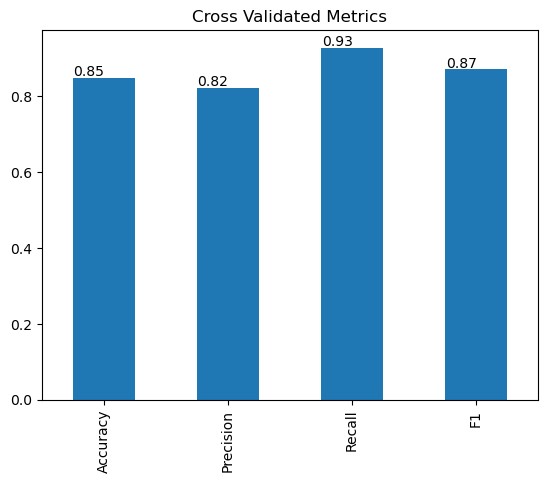

In [57]:
#Visualizing Cross Validated Metrics
cv_metrics=pd.DataFrame({"Accuracy":np.mean(cv_acc),
                        "Precision":np.mean(cv_precision),
                        "Recall":np.mean(cv_recall),
                        "F1":np.mean(cv_f1)},index=[0])

ax=cv_metrics.T.plot(kind='bar',legend=False,title="Cross Validated Metrics")

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()*1.005,p.get_height()*1.005))

In [58]:
#Feature Importance

clf.fit(X_train,y_train)
clf.coef_

array([[ 0.00316727, -0.86044578,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275785,  0.02459361, -0.60413036, -0.56862854,
         0.45051616, -0.63609862, -0.67663375]])

In [59]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672720768507814,
 'sex': -0.8604457840909668,
 'cp': 0.6606707373068773,
 'trestbps': -0.011569930042204362,
 'chol': -0.0016637426043596675,
 'fbs': 0.043861316062721256,
 'restecg': 0.31275784563187076,
 'thalach': 0.024593609073345644,
 'exang': -0.6041303616658992,
 'oldpeak': -0.5686285350106478,
 'slope': 0.45051615703083675,
 'ca': -0.6360986203359418,
 'thal': -0.6766337522639021}

<Axes: title={'center': 'Feature Importance'}>

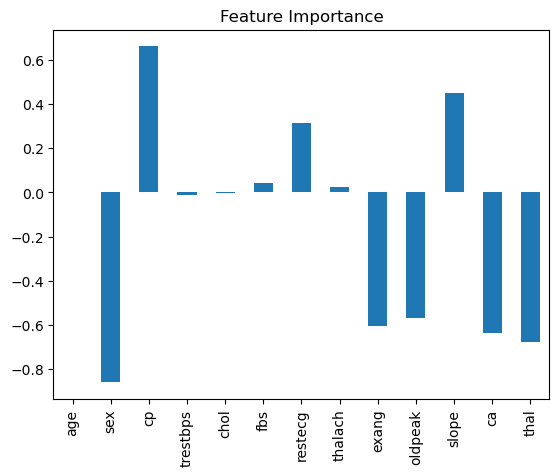

In [61]:
#Visualizing Feature Importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(legend=False,title="Feature Importance")